<a href="https://colab.research.google.com/github/Mauroalejandro220779/colombia-ekc-modeling-elasticnet/blob/main/TFM_Mauro_Reyes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABAJO FINAL DE MASTER - Mauro Reyes


### 1. Configuración del entorno

In [ ]:
import pandas as pd                # Librería de manejo de datos tabulares
import numpy as np                 # Librería de manejo de vectores y matrices

import seaborn as sns              # Librería de visualización
import matplotlib.pyplot as plt

from google.colab import files
from google.colab import data_table
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pathlib import Path
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

pd.options.display.float_format = "{:.2f}".format
sns.set(color_codes=True)
sns.set_theme(style="white")
rng = np.random.default_rng(47)
print(f"Inicio OK: {int(rng.random()*1e4)}")

Inicio OK: 7418


## 2. Entendimiento de los datos

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Se ha subido el fichero "{name}" con longitud {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

print()
print(f"Descarga OK: {int(rng.random()*1e4)}")

Saving BASE.xlsx to BASE.xlsx
Se ha subido el fichero "BASE.xlsx" con longitud 67390 bytes

Descarga OK: 7536


### 2.1 Descripción general de los datos

*   GEI-CO2-EQ = Son todas las emisiones de GEI en carbono equivalente (CO2eq) en términos per capita.
*   CO2-exc-LandUse = Son las emisiones de CO2 de fuentes fósiles y la industria en términos per capita. EXcluye cambio de uso del suelo.
*   CO2-inc-LandUse = Son las emisiones de CO2 de fuentes fósiles y la industria en términos per capita. INcluye cambio de uso del suelo.
*   CO2-Landuse = Son las emisiones de CO2 de cambio de uso del suelo en términos per capita.
*   CH4-CO2 = Son las emisiones de gas metano en carbono equivalente (CO2eq) en términos per capita.
*   N2O-C02 = Son las emisiones de óxido nitroso en carbono equivalente (CO2eq) en términos per capita.
*   CO2-Cemento = Son las emisiones de CO2 del cemento en términos per capita.
*   CO2-Flaring = Son las emisiones de CO2 de quema de combustible en términos per capita.
*   CO2-Gas = Son las emisiones de CO2 de gas de combustible en términos per capita.
*   CO2-Oil = Son las emisiones de CO2 de petróleo de combustible en términos per capita.
*   PIB = Producto Interno Bruto en US$ a precios constantes de 2015 en términos per capita.
*   TRADE = Comercio como % del PIB.
*   POB = Población.
*   IPC = Índice de Precios (2010 = 100)
*   CONSUMO = Gasto de consumo final de los hogares (% del PIB)




















In [ ]:
import pandas as pd

# Leer el archivo Excel
df = pd.read_excel("BASE.xlsx")

# Tamaño del archivo (en bytes)
import os
print(f"Tamaño del fichero: {os.path.getsize('BASE.xlsx')} bytes")

# Número de filas y columnas
print(f"\nFilas: {len(df)}, Columnas: {len(df.columns)}")

# Mostrar primeras y últimas filas
print("\nPrimeras 10 líneas:")
display(df.head(10))

print("\nÚltimas 10 líneas:")
display(df.tail(10))

Tamaño del fichero: 67390 bytes

Filas: 64, Columnas: 18

Primeras 10 líneas:


,Year,GEI-CO2-EQ,CO2-exc-LandUse,CO2-inc-LandUse,CO2-Landuse,CH4-CO2,N2O-C02,CO2-Cemento,CO2-Coal,CO2-Flaring,CO2-Gas,CO2-Oil,PIB,PIB2,TRADE,POB,IPC,CONSUMO
0,1960,20.75,1.04,17.60,16.55,2.37,0.53,0.05,0.43,0.02,0.04,0.51,1951.04,3806568.31,30.45,15687688,0.06,73.03
1,1961,24.18,1.12,24.22,23.09,2.42,0.55,0.05,0.45,0.02,0.04,0.57,1987.65,3950765.12,26.82,16182414,0.06,74.08
2,1962,20.87,1.16,19.24,18.07,2.41,0.55,0.05,0.46,0.02,0.06,0.57,2031.35,4126364.93,24.45,16691282,0.06,74.84
3,1963,18.70,1.23,16.49,15.25,2.38,0.54,0.05,0.48,0.02,0.08,0.61,2034.76,4140243.67,24.33,17210956,0.08,75.21
4,1964,21.73,1.22,20.76,19.53,2.35,0.54,0.06,0.44,0.04,0.08,0.62,2095.85,4392576.32,24.61,17739754,0.10,76.72
5,1965,14.14,1.25,11.31,10.06,2.34,0.53,0.06,0.40,0.10,0.09,0.62,2107.61,4442021.43,21.84,18275814,0.10,74.54
6,1966,11.50,1.25,8.22,6.96,2.31,0.53,0.05,0.34,0.09,0.11,0.66,2154.83,4643295.11,24.33,18811407,0.12,76.61
7,1967,10.04,1.28,6.51,5.23,2.30,0.53,0.05,0.41,0.07,0.11,0.64,2182.15,4761791.11,21.55,19343961,0.13,73.55
8,1968,8.69,1.34,5.50,4.15,2.31,0.54,0.06,0.40,0.05,0.11,0.72,2250.14,5063135.20,24.58,19872503,0.14,73.49
9,1969,8.87,1.37,4.68,3.30,2.29,0.54,0.06,0.42,0.07,0.12,0.72,2326.60,5413088.81,25.55,20392264,0.15,73.79



Últimas 10 líneas:


,Year,GEI-CO2-EQ,CO2-exc-LandUse,CO2-inc-LandUse,CO2-Landuse,CH4-CO2,N2O-C02,CO2-Cemento,CO2-Coal,CO2-Flaring,CO2-Gas,CO2-Oil,PIB,PIB2,TRADE,POB,IPC,CONSUMO
54,2014,6.19,2.11,3.73,1.71,1.84,0.38,0.11,0.39,0.03,0.51,0.97,6107.08,37296463.00,37.49,46677947,112.00,65.97
55,2015,5.69,2.05,3.60,1.51,1.79,0.36,0.12,0.41,0.03,0.52,1.01,6228.65,38796101.02,38.36,47119728,117.59,68.48
56,2016,5.41,2.09,2.73,0.74,1.80,0.37,0.11,0.41,0.02,0.48,0.96,6291.08,39577683.76,36.20,47625955,126.42,69.06
57,2017,5.20,1.91,4.64,2.84,1.81,0.38,0.11,0.31,0.02,0.47,0.89,6280.89,39449592.38,35.28,48351671,131.88,68.51
58,2018,5.09,1.77,3.79,2.02,1.84,0.39,0.11,0.28,0.02,0.48,0.88,6320.99,39954924.02,36.53,49276961,136.15,68.12
59,2019,5.15,1.88,2.73,0.83,1.87,0.40,0.11,0.36,0.02,0.49,0.91,6404.11,41012609.07,37.56,50187406,140.95,68.67
60,2020,5.00,1.76,1.96,0.19,1.82,0.41,0.10,0.33,0.01,0.47,0.85,5857.17,34306470.35,34.06,50930662,144.51,70.72
61,2021,5.14,1.86,2.04,0.20,1.83,0.41,0.11,0.23,0.01,0.43,1.06,6416.01,41165163.91,40.06,51516562,149.56,72.70
62,2022,5.24,1.92,2.00,0.10,1.83,0.41,0.12,0.20,0.01,0.42,1.15,6836.23,46734023.35,48.07,51874024,164.78,73.87
63,2023,4.95,2.01,2.07,0.06,1.85,0.44,0.12,0.31,0.01,0.43,1.15,6850.20,46925189.97,40.48,52085168,184.12,77.51


Veamos el tipo de datos de cada variable:

In [ ]:
print (df.dtypes)
print(df.shape)
df.describe().T


Year                 int64
GEI-CO2-EQ         float64
CO2-exc-LandUse    float64
CO2-inc-LandUse    float64
CO2-Landuse        float64
CH4-CO2            float64
N2O-C02            float64
CO2-Cemento        float64
CO2-Coal           float64
CO2-Flaring        float64
CO2-Gas            float64
CO2-Oil            float64
PIB                float64
PIB2               float64
TRADE              float64
POB                  int64
IPC                float64
CONSUMO            float64
dtype: object
(64, 18)


,count,mean,std,min,25%,50%,75%,max
Year,64.00,1991.50,18.62,1960.00,1975.75,1991.50,2007.25,2023.00
GEI-CO2-EQ,64.00,8.01,4.72,4.75,5.33,6.06,7.96,24.18
CO2-exc-LandUse,64.00,1.60,0.24,1.04,1.42,1.64,1.75,2.11
CO2-inc-LandUse,64.00,5.17,5.22,0.68,2.25,3.50,5.12,24.22
CO2-Landuse,64.00,3.57,5.36,-0.75,0.67,1.70,3.40,23.09
CH4-CO2,64.00,2.09,0.19,1.79,1.94,2.05,2.30,2.42
N2O-C02,64.00,0.48,0.07,0.36,0.43,0.49,0.54,0.59
CO2-Cemento,64.00,0.09,0.02,0.05,0.07,0.08,0.10,0.12
CO2-Coal,64.00,0.35,0.08,0.18,0.30,0.38,0.41,0.48
CO2-Flaring,64.00,0.04,0.02,0.01,0.02,0.03,0.05,0.10


In [ ]:
df.head()


,Year,GEI-CO2-EQ,CO2-exc-LandUse,CO2-inc-LandUse,CO2-Landuse,CH4-CO2,N2O-C02,CO2-Cemento,CO2-Coal,CO2-Flaring,CO2-Gas,CO2-Oil,PIB,PIB2,TRADE,POB,IPC,CONSUMO
0,1960,20.75,1.04,17.60,16.55,2.37,0.53,0.05,0.43,0.02,0.04,0.51,1951.04,3806568.31,30.45,15687688,0.06,73.03
1,1961,24.18,1.12,24.22,23.09,2.42,0.55,0.05,0.45,0.02,0.04,0.57,1987.65,3950765.12,26.82,16182414,0.06,74.08
2,1962,20.87,1.16,19.24,18.07,2.41,0.55,0.05,0.46,0.02,0.06,0.57,2031.35,4126364.93,24.45,16691282,0.06,74.84
3,1963,18.70,1.23,16.49,15.25,2.38,0.54,0.05,0.48,0.02,0.08,0.61,2034.76,4140243.67,24.33,17210956,0.08,75.21
4,1964,21.73,1.22,20.76,19.53,2.35,0.54,0.06,0.44,0.04,0.08,0.62,2095.85,4392576.32,24.61,17739754,0.10,76.72


### 3. Análisis Univariante

In [ ]:
def analyze_df(df):
  data_types = dict(df.dtypes)
  numeric_cols = []
  categoric_cols = []
  for c,t in data_types.items():
    if t == np.float64:
      numeric_cols.append([c, 'Cuantitativa continua', df[c].mean(), df[c].min(), df[c].max(), df[c].median()])
    elif t == np.int64 or pd.Int64Dtype.is_dtype(t):
      numeric_cols.append([c, 'Cuantitativa discreta', df[c].mean(), df[c].min(), df[c].max(), df[c].median()])
    else:
      categoric_cols.append([c, f'Cualitativa', df[c].nunique()])
  n = pd.DataFrame(numeric_cols, columns=['Nombre', 'Tipo de variable', 'Media', 'Mínimo', 'Máximo', 'Mediana'])
  c = pd.DataFrame(categoric_cols, columns=['Nombre', 'Tipo de variable', 'Número de clases'])
  return n, c

numeric_types, categoric_types = analyze_df(df)
print("Finalizado OK")


Finalizado OK


#### 3.1 Variables Cuantitativas


Se procede al análisis de las variables, las cuales son todas  cuantitativas y vemos sus estadísticos básicos:

In [ ]:
print(numeric_types.to_string(index=False))

         Nombre      Tipo de variable       Media      Mínimo      Máximo     Mediana
           Year Cuantitativa discreta     1991.50     1960.00     2023.00     1991.50
     GEI-CO2-EQ Cuantitativa continua        8.01        4.75       24.18        6.06
CO2-exc-LandUse Cuantitativa continua        1.60        1.04        2.11        1.64
CO2-inc-LandUse Cuantitativa continua        5.17        0.68       24.22        3.50
    CO2-Landuse Cuantitativa continua        3.57       -0.75       23.09        1.70
        CH4-CO2 Cuantitativa continua        2.09        1.79        2.42        2.05
        N2O-C02 Cuantitativa continua        0.48        0.36        0.59        0.49
    CO2-Cemento Cuantitativa continua        0.09        0.05        0.12        0.08
       CO2-Coal Cuantitativa continua        0.35        0.18        0.48        0.38
    CO2-Flaring Cuantitativa continua        0.04        0.01        0.10        0.03
        CO2-Gas Cuantitativa continua        0.28     

Para conocer su distribución se visualizan cada una con un histograma:

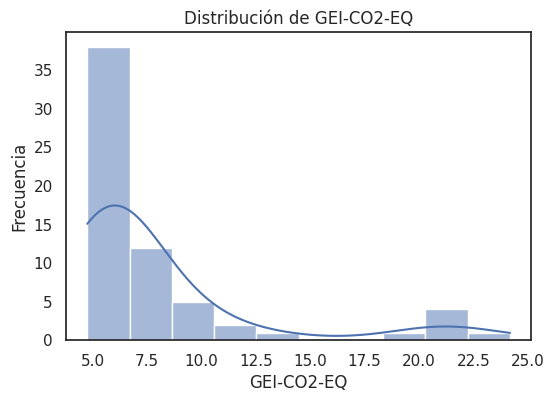

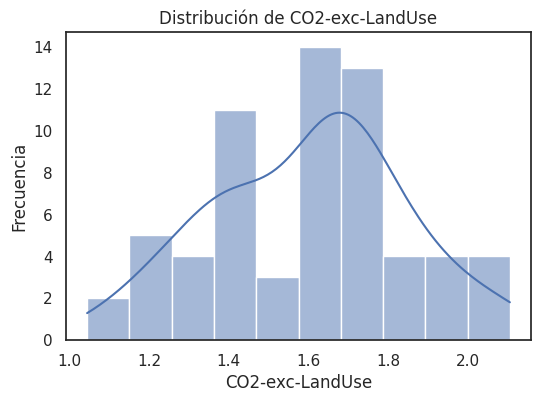

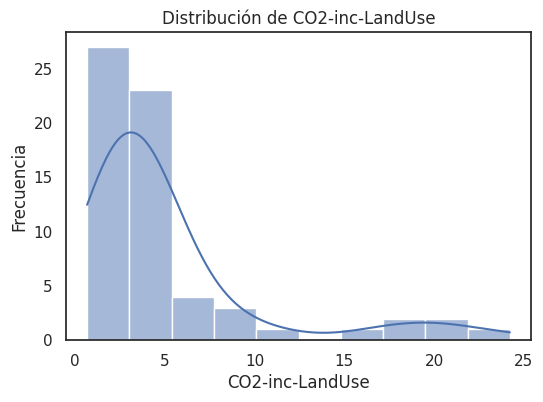

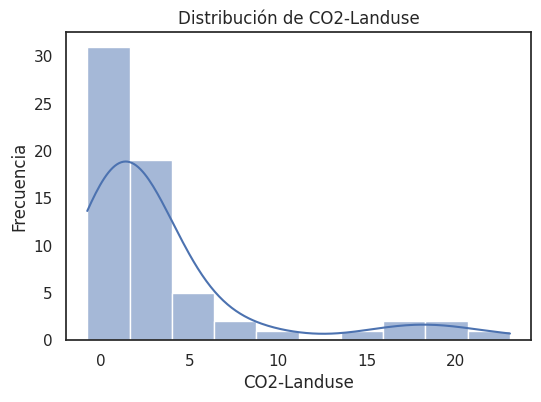

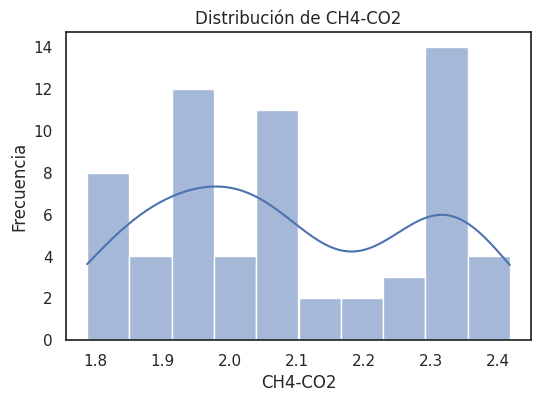

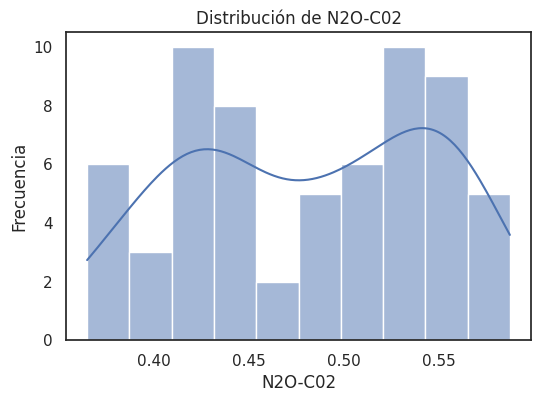

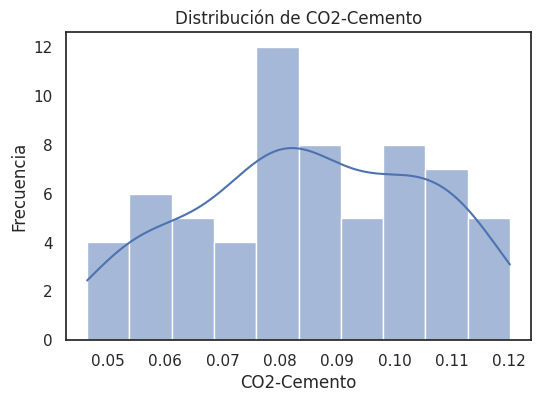

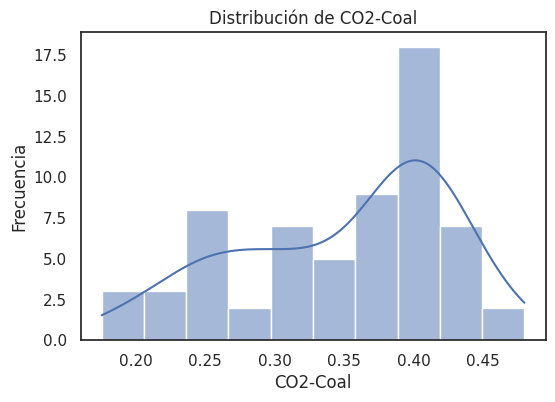

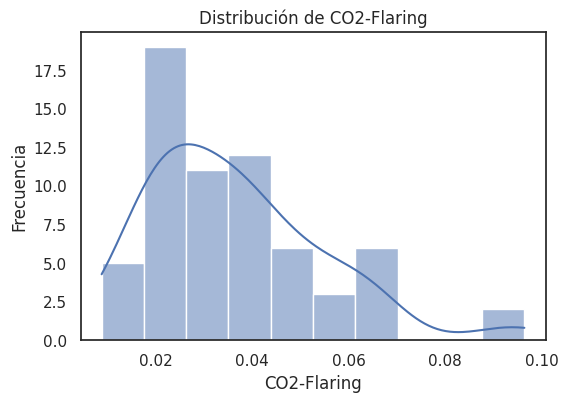

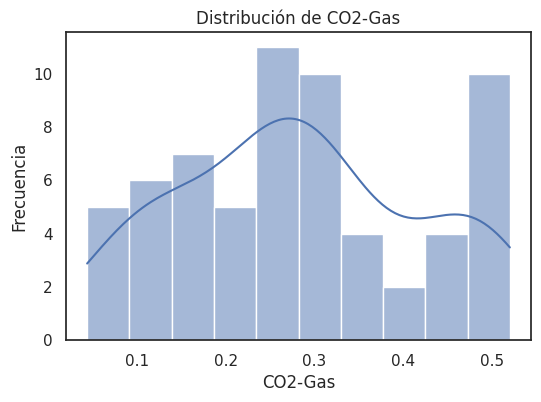

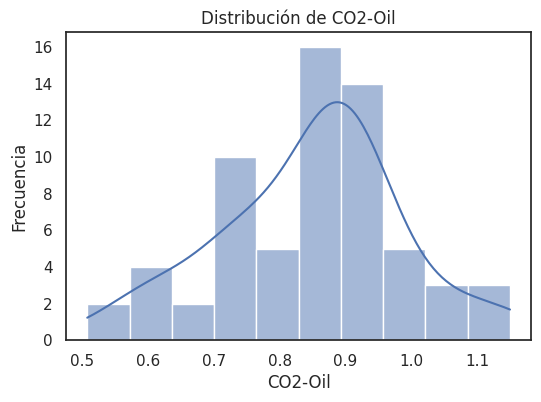

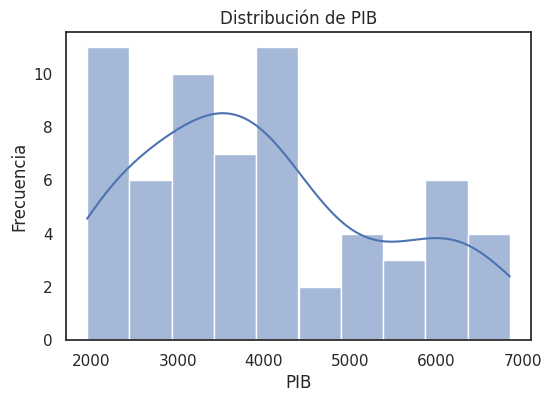

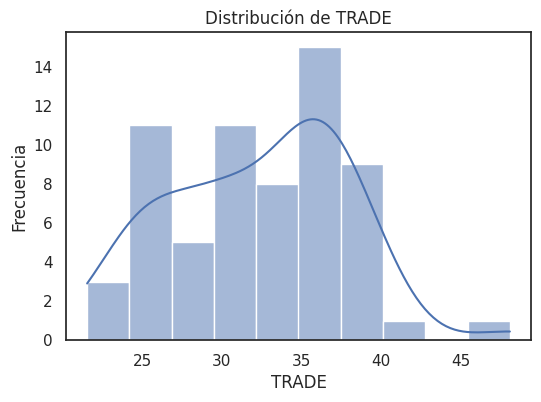

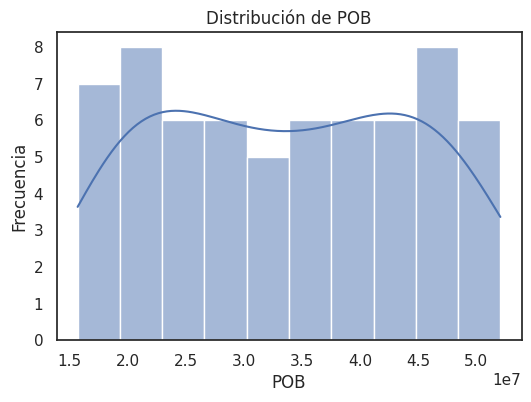

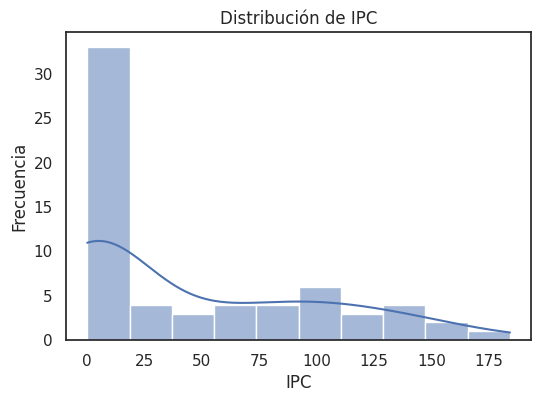

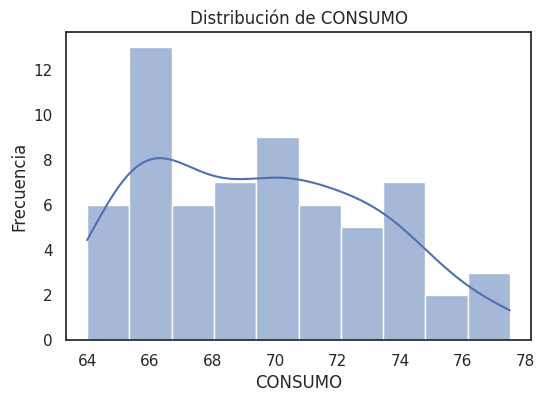

In [ ]:
variables = ['GEI-CO2-EQ', 'CO2-exc-LandUse', 'CO2-inc-LandUse', 'CO2-Landuse', 'CH4-CO2', 'N2O-C02', 'CO2-Cemento', 'CO2-Coal', 'CO2-Flaring', 'CO2-Gas', 'CO2-Oil', 'PIB','TRADE',
             'POB','IPC','CONSUMO']

for var in variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var], kde=True, bins=10)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()


### 4. Análisis Bivariante

Se realiza el análisis de cada variable frente a la variable objetivo que en principio son:

*  GEI-CO2-EQ = Son todas las emisiones de GEI en carbono equivalente (CO2eq) en términos per capita.
*   CO2-exc-LandUse = Son las emisiones de CO2 de fuentes fósiles y la industria en términos per capita. EXcluye cambio de uso del suelo.



#### 4.1 Variables Cuantitativas vs Variable Objetivo

Para conocer el comportamiento de las variables cuantitativas frente a la variable objetivo se utiliza el ScatterPlot.

In [ ]:
# Crear la columna Periodo incluyendo 2023 en el último periodo
def asignar_periodo(year):
    if 1960 <= year <= 1997:
        return '1960-1997'
    elif 1995 <= year <= 2006:
        return '1998-2006'
    elif 2010 <= year <= 2023:  # Incluimos 2023 aquí
        return '2007-2023'
    else:
        return 'Otro'

df['Periodo'] = df['Year'].apply(asignar_periodo)

print("Columna 'Periodo' creada exitosamente")
print("Años en el dataset:", df['Year'].min(), "-", df['Year'].max())
print("Valores únicos en Periodo:", df['Periodo'].unique())
print("\nDistribución por periodo:")
print(df['Periodo'].value_counts().sort_index())

Columna 'Periodo' creada exitosamente
Años en el dataset: 1960 - 2023
Valores únicos en Periodo: ['1960-1997' '1998-2006' 'Otro' '2007-2023']

Distribución por periodo:
Periodo
1960-1997    38
1998-2006     9
2007-2023    14
Otro          3
Name: count, dtype: int64


Columna 'Periodo' creada exitosamente
Años en el dataset: 1960 - 2023
Valores únicos en Periodo: ['1960–1997' '1998–2006' '2007–2023']

Distribución por periodo:
Periodo
1960–1997    38
1998–2006     9
2007–2023    17
Name: count, dtype: int64


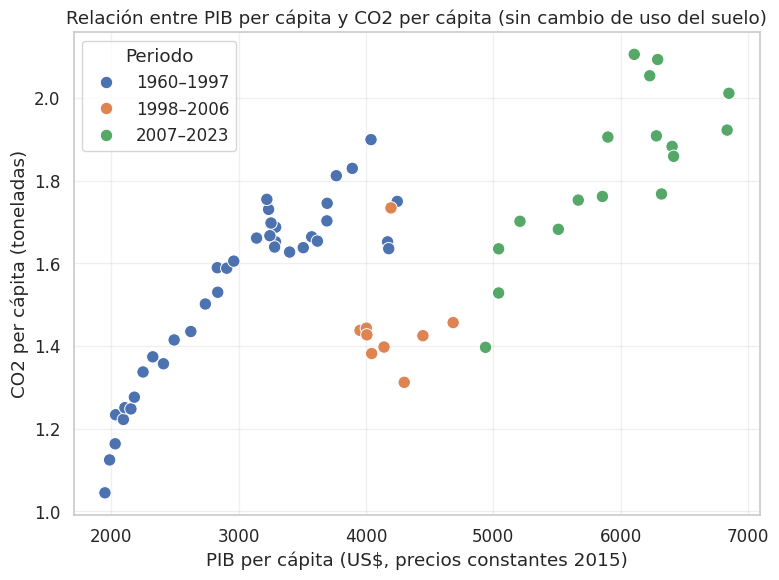

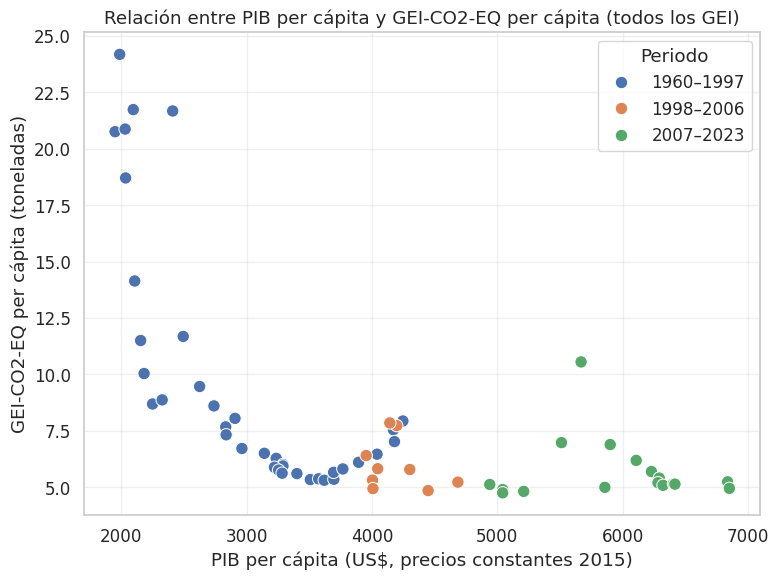

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Crear columna de periodos económicos ---
def asignar_periodo(year):
    if 1960 <= year <= 1997:
        return '1960–1997'
    elif 1998 <= year <= 2006:
        return '1998–2006'
    elif 2007 <= year <= 2023:
        return '2007–2023'
    else:
        return 'Otro'

df['Periodo'] = df['Year'].apply(asignar_periodo)

# --- Verificación rápida ---
print("Columna 'Periodo' creada exitosamente")
print("Años en el dataset:", df['Year'].min(), "-", df['Year'].max())
print("Valores únicos en Periodo:", df['Periodo'].unique())
print("\nDistribución por periodo:")
print(df['Periodo'].value_counts().sort_index())

# --- Estilo general ---
sns.set(style='whitegrid', palette='deep', font_scale=1.1)

# --- GRÁFICO 1: CO2 sin cambio de uso del suelo ---
plt.figure(figsize=(8,6))
sns.scatterplot(x='PIB', y='CO2-exc-LandUse', hue='Periodo', data=df, s=80)
plt.title('Relación entre PIB per cápita y CO2 per cápita (sin cambio de uso del suelo)')
plt.xlabel('PIB per cápita (US$, precios constantes 2015)')
plt.ylabel('CO2 per cápita (toneladas)')
plt.grid(True, alpha=0.3)
plt.legend(title='Periodo', loc='best')
plt.tight_layout()
plt.show()

# --- GRÁFICO 2: GEI totales ---
plt.figure(figsize=(8,6))
sns.scatterplot(x='PIB', y='GEI-CO2-EQ', hue='Periodo', data=df, s=80)
plt.title('Relación entre PIB per cápita y GEI-CO2-EQ per cápita (todos los GEI)')
plt.xlabel('PIB per cápita (US$, precios constantes 2015)')
plt.ylabel('GEI-CO2-EQ per cápita (toneladas)')
plt.grid(True, alpha=0.3)
plt.legend(title='Periodo', loc='best')
plt.tight_layout()
plt.show()


### 5. Análisis Multivariante

Tras el estudio frente a la variable objetivo, vamos a calcular la matriz de correlación para ver las dependencias entre variables cuantitativas.

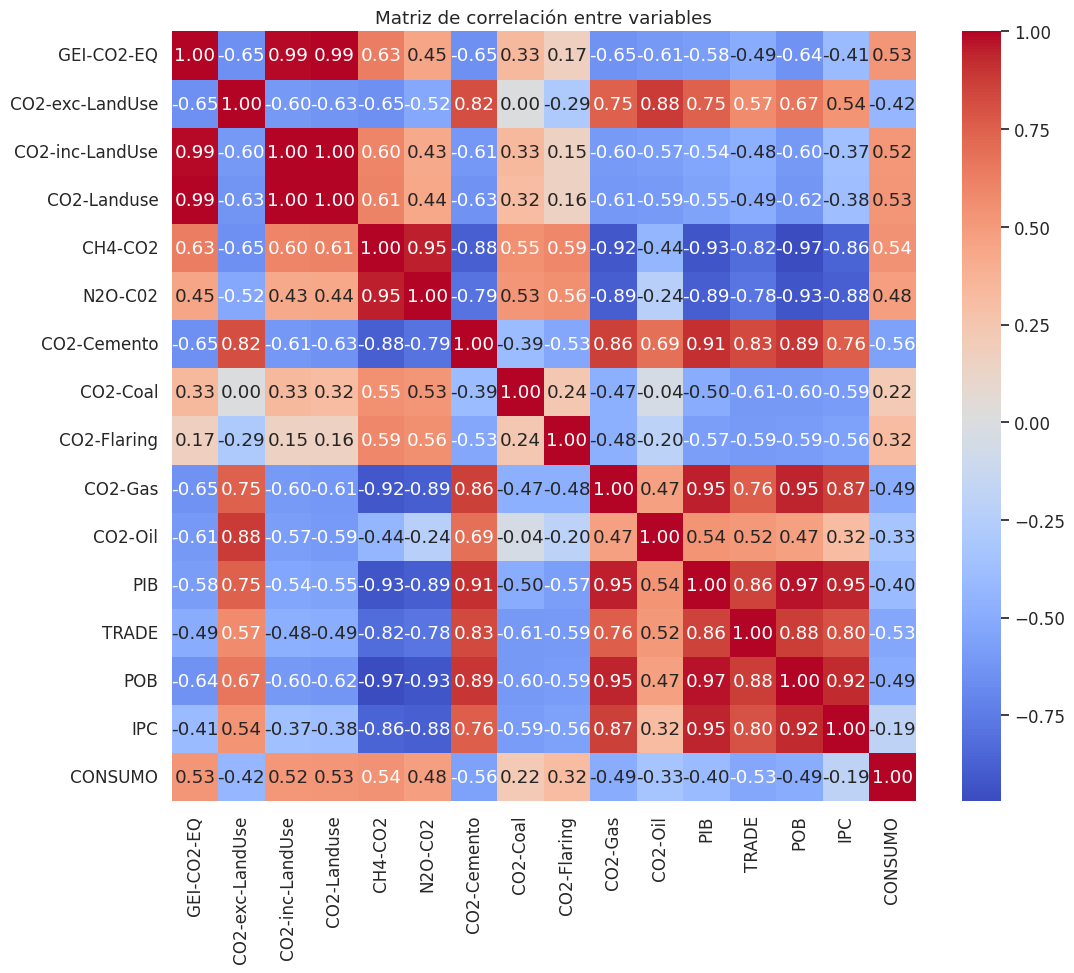

In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = df[variables].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de correlación entre variables")
plt.show()


### 6. Calidad del dato

#### 6.1 Detectar valores nulos

In [ ]:
print("Número de filas válidas por columna:")
print(df.count().to_string())
print()

Número de filas válidas por columna:
Year               64
GEI-CO2-EQ         64
CO2-exc-LandUse    64
CO2-inc-LandUse    64
CO2-Landuse        64
CH4-CO2            64
N2O-C02            64
CO2-Cemento        64
CO2-Coal           64
CO2-Flaring        64
CO2-Gas            64
CO2-Oil            64
PIB                64
PIB2               64
TRADE              64
POB                64
IPC                64
CONSUMO            64
Periodo            64



#### 6.2 Detectar valores atípicos

Analizamos los valores atípicos de las variables cuantitativas para descartarlos posteriormente.

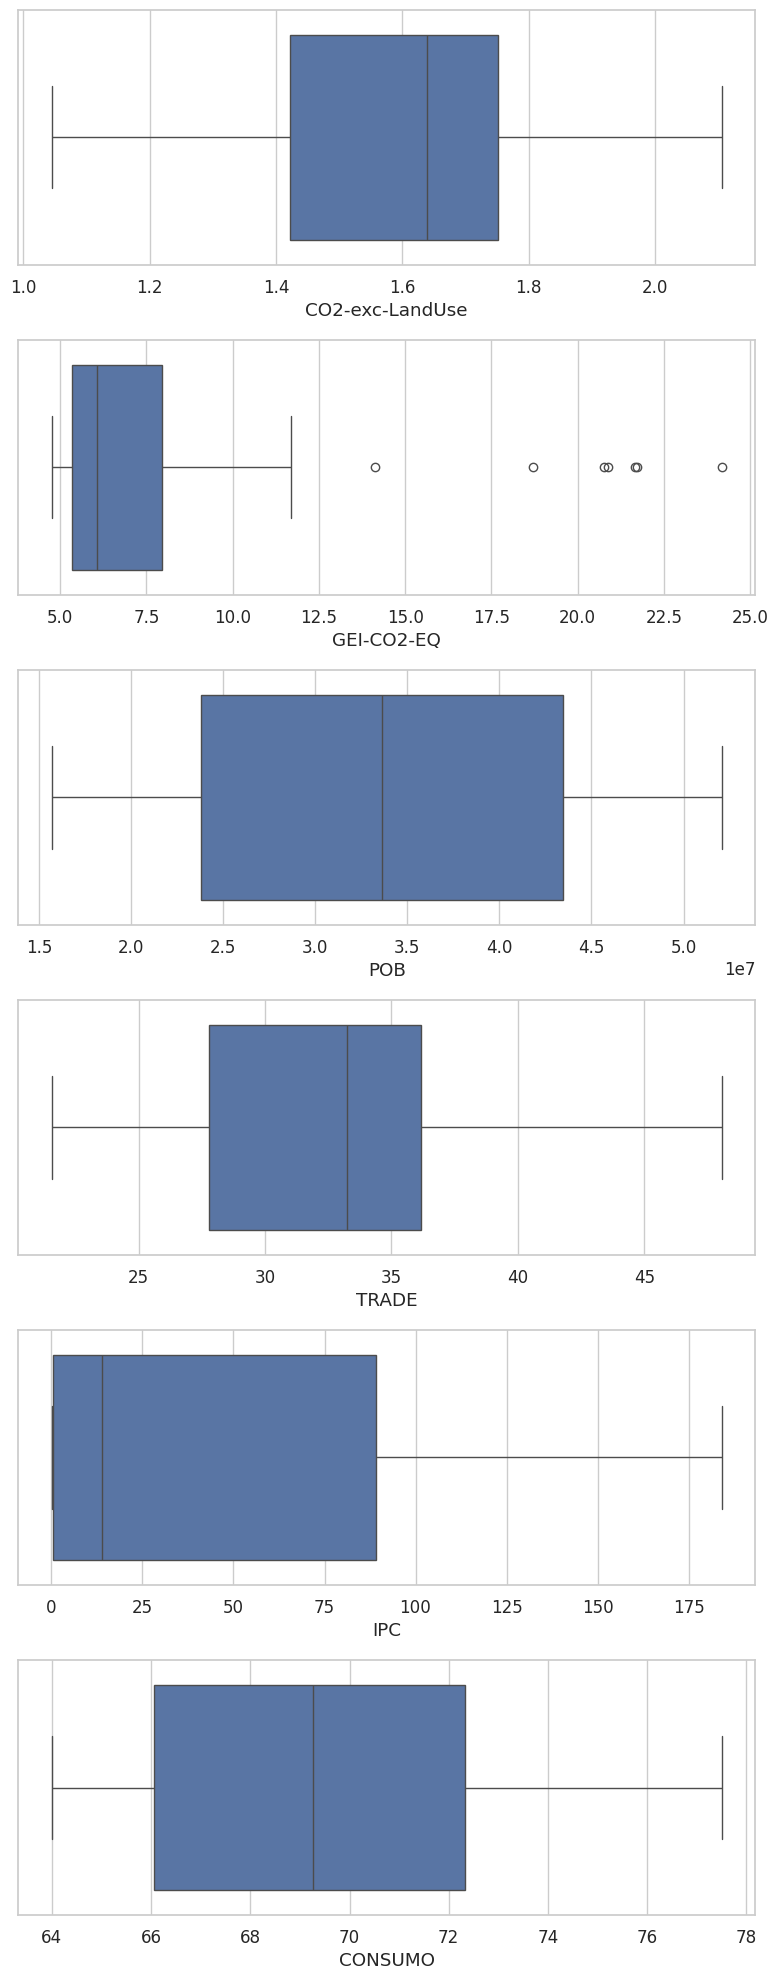

In [ ]:
fig, axs = plt.subplots(nrows=6, figsize=(8, 20))  # 6 variables = 6 boxplots

sns.boxplot(x=df['CO2-exc-LandUse'], ax=axs[0])
sns.boxplot(x=df['GEI-CO2-EQ'], ax=axs[1])
sns.boxplot(x=df['POB'], ax=axs[2])
sns.boxplot(x=df['TRADE'], ax=axs[3])
sns.boxplot(x=df['IPC'], ax=axs[4])
sns.boxplot(x=df['CONSUMO'], ax=axs[5])

plt.tight_layout()
plt.show()


## 7. Estandarización de los datos

Las variables se emplean en niveles y se estandarizan mediante StandardScaler, dado que el objetivo es puramente predictivo y el modelo Elastic Net es sensible a la escala de las variables

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Variables independientes
indep_vars_model2 = ['PIB', 'TRADE', 'POB', 'IPC', 'CONSUMO']

X = df[indep_vars_model2]
y = df['CO2-exc-LandUse']

# Escalado (necesario para Elastic Net)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame (opcional pero recomendable)
X_scaled = pd.DataFrame(X_scaled, columns=indep_vars_model2)


## 8. Desarrollo y Evaluación de los modelos

Como queremos estimar una variable cuantitativa, es un problema de regresión y siguiendo la guía de scikit-learn:
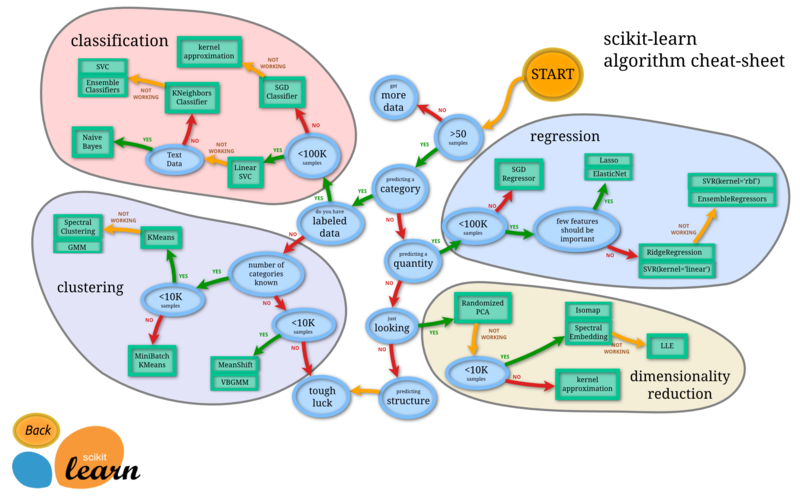



### **FASE I: VALIDACIÓN DE LA EKC E IDENTIFICACIÓN DEL TURNING POINT**

In [ ]:
print(df.columns.tolist())

['Year', 'GEI-CO2-EQ', 'CO2-exc-LandUse', 'CO2-inc-LandUse', 'CO2-Landuse', 'CH4-CO2', 'N2O-C02', 'CO2-Cemento', 'CO2-Coal', 'CO2-Flaring', 'CO2-Gas', 'CO2-Oil', 'PIB', 'PIB2', 'TRADE', 'POB', 'IPC', 'CONSUMO', 'Periodo']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Variable ambiental (per capita)
df['ln_CO2'] = np.log(df['CO2-exc-LandUse'])

# PIB per capita
df['ln_PIB'] = np.log(df['PIB'])
df['ln_PIB2'] = df['ln_PIB']**2

# Controles
df['ln_POB'] = np.log(df['POB'])
df['ln_IPC'] = np.log(df['IPC'])

# TRADE y CONSUMO quedan en nivel (% PIB)


In [ ]:
X = df[['ln_PIB', 'ln_PIB2', 'TRADE', 'ln_POB', 'ln_IPC', 'CONSUMO']]
X = sm.add_constant(X)

y = df['ln_CO2']


In [ ]:
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 ln_CO2   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     51.64
Date:                Fri, 16 Jan 2026   Prob (F-statistic):           2.92e-21
Time:                        02:26:17   Log-Likelihood:                 87.928
No. Observations:                  64   AIC:                            -161.9
Df Residuals:                      57   BIC:                            -146.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -30.3352      6.454     -4.700      0.0

In [ ]:
beta1 = model.params['ln_PIB']
beta2 = model.params['ln_PIB2']

print(f"β1 (PIB): {beta1}")
print(f"β2 (PIB²): {beta2}")

if beta1 > 0 and beta2 < 0:
    print("✔ Evidencia empírica de Curva Ambiental de Kuznets (forma de U invertida)")
else:
    print("✘ No se valida la EKC")


β1 (PIB): 10.551954654686675
β2 (PIB²): -0.5474310042186964
✔ Evidencia empírica de Curva Ambiental de Kuznets (forma de U invertida)


In [ ]:
turning_point_ln = -beta1 / (2 * beta2)
turning_point_real = np.exp(turning_point_ln)

print("Turning point ln(PIB pc):", turning_point_ln)
print("Turning point PIB per capita (USD 2015):", turning_point_real)


Turning point ln(PIB pc): 9.637702809458718
Turning point PIB per capita (USD 2015): 15332.08253173836


In [ ]:
bp = het_breuschpagan(model.resid, X)
labels = ['LM Stat', 'LM p-value', 'F Stat', 'F p-value']
print(dict(zip(labels, bp)))


{'LM Stat': np.float64(10.35569051056111), 'LM p-value': np.float64(0.11045034408888658), 'F Stat': np.float64(1.8339141800249799), 'F p-value': np.float64(0.10860876598678193)}


In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name):
    result = adfuller(series, autolag='AIC')
    print(f'\nADF Test - {name}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value:.4f}')
    if result[1] <= 0.05:
        print("=> Estacionaria (I(0))")
    else:
        print("=> No estacionaria (I(1))")

# Ejecutar tests
adf_test(df['ln_CO2'], 'ln_CO2')
adf_test(df['ln_PIB'], 'ln_PIB')
adf_test(df['TRADE'], 'TRADE')
adf_test(df['ln_POB'], 'ln_POB')
adf_test(df['ln_IPC'], 'ln_IPC')
adf_test(df['CONSUMO'], 'CONSUMO')



ADF Test - ln_CO2
ADF Statistic: -2.3153
p-value: 0.1671
Critical Value 1%: -3.5387
Critical Value 5%: -2.9086
Critical Value 10%: -2.5919
=> No estacionaria (I(1))

ADF Test - ln_PIB
ADF Statistic: -0.5705
p-value: 0.8775
Critical Value 1%: -3.5387
Critical Value 5%: -2.9086
Critical Value 10%: -2.5919
=> No estacionaria (I(1))

ADF Test - TRADE
ADF Statistic: -0.7999
p-value: 0.8192
Critical Value 1%: -3.5424
Critical Value 5%: -2.9102
Critical Value 10%: -2.5927
=> No estacionaria (I(1))

ADF Test - ln_POB
ADF Statistic: -2.9106
p-value: 0.0441
Critical Value 1%: -3.5553
Critical Value 5%: -2.9157
Critical Value 10%: -2.5957
=> Estacionaria (I(0))

ADF Test - ln_IPC
ADF Statistic: -2.2578
p-value: 0.1859
Critical Value 1%: -3.5424
Critical Value 5%: -2.9102
Critical Value 10%: -2.5927
=> No estacionaria (I(1))

ADF Test - CONSUMO
ADF Statistic: -1.1287
p-value: 0.7035
Critical Value 1%: -3.5387
Critical Value 5%: -2.9086
Critical Value 10%: -2.5919
=> No estacionaria (I(1))


In [ ]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

bg_test = acorr_breusch_godfrey(model, nlags=1)
labels = ['LM Stat', 'LM p-value', 'F Stat', 'F p-value']
print(dict(zip(labels, bg_test)))


{'LM Stat': np.float64(28.43411828934785), 'LM p-value': np.float64(9.694174510209834e-08), 'F Stat': 44.77073384986766, 'F p-value': 1.1195797566468682e-08}


### **FASE II COMPARACIÓN DE MODELOS PARAMÉTRICOS Y NO PARAMÉTRICOS**

🚀 INICIANDO ANÁLISIS COMPARATIVO COMPLETO
📊 Modelos Paramétricos vs No Paramétricos

🚀 ANÁLISIS COMPLETO: MODELO 1 (CO2-EXC-LANDUSE)

📊 MODELOS PARAMÉTRICOS:
   - OLS R² entrenamiento: 0.9076
   - OLS R² test: 0.9308

🔍 VALIDACIÓN DE SUPUESTOS OLS
📊 NORMALIDAD:
   - Shapiro-Wilk: p-value = 0.1880
   - Jarque-Bera: p-value = 0.1348

📊 HOMOCEDASTICIDAD:
   - Breusch-Pagan: p-value = 0.5480

📊 AUTOCORRELACIÓN:
   - Durbin-Watson: 2.0505

   - Elastic Net R² test: 0.9306
   - Mejor alpha: 0.000100
   - Mejor l1_ratio: 0.1000

🤖 ENTRENANDO MODELOS NO PARAMÉTRICOS (ML)

📊 Entrenando Random Forest...
   - R² en test: 0.8444
   - RMSE: 0.1068
   - MAE: 0.0801
   - R² CV (5-fold): 0.7733 (±0.0615)

📊 Entrenando XGBoost...
   - R² en test: 0.9131
   - RMSE: 0.0798
   - MAE: 0.0642
   - R² CV (5-fold): 0.8224 (±0.0469)

📊 Entrenando LightGBM...
   - R² en test: 0.3054
   - RMSE: 0.2256
   - MAE: 0.1746
   - R² CV (5-fold): -0.1047 (±0.1915)

📊 Entrenando SVR...
   - R² en test: 0.8096
   - RMSE: 

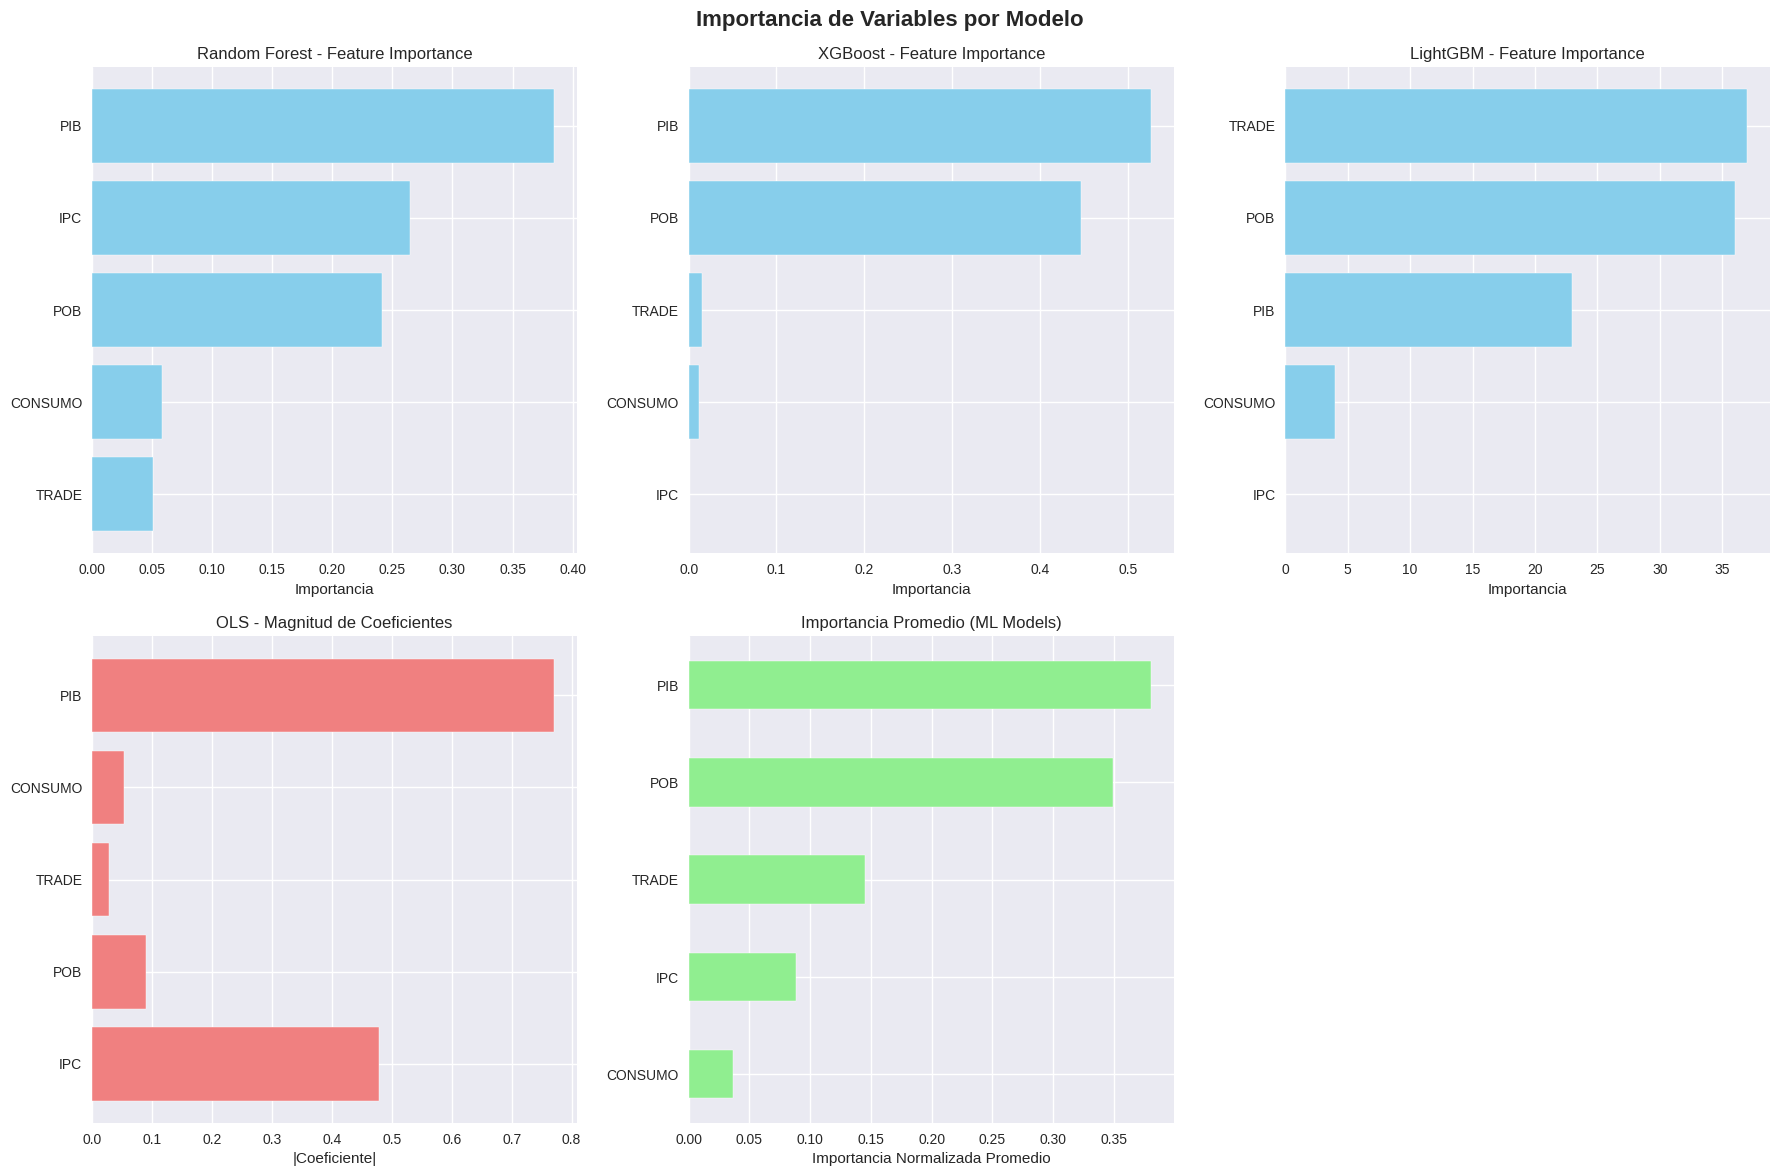


📋 RESUMEN IMPORTANCIA PROMEDIO:
PIB       0.38
POB       0.35
TRADE     0.15
IPC       0.09
CONSUMO   0.04
Name: mean_importance, dtype: float64

🏆 COMPARACIÓN GLOBAL DE MODELOS

📊 MÉTRICAS DE COMPARACIÓN:
       Modelo   R²  RMSE  MAE                     Tipo
  Elastic Net 0.93  0.07 0.06 Paramétrico Regularizado
      XGBoost 0.91  0.08 0.06           No Paramétrico
          OLS 0.91  0.07 0.06              Paramétrico
Random Forest 0.84  0.11 0.08           No Paramétrico
          SVR 0.81  0.12 0.10           No Paramétrico
         K-NN 0.74  0.14 0.10           No Paramétrico
     LightGBM 0.31  0.23 0.17           No Paramétrico


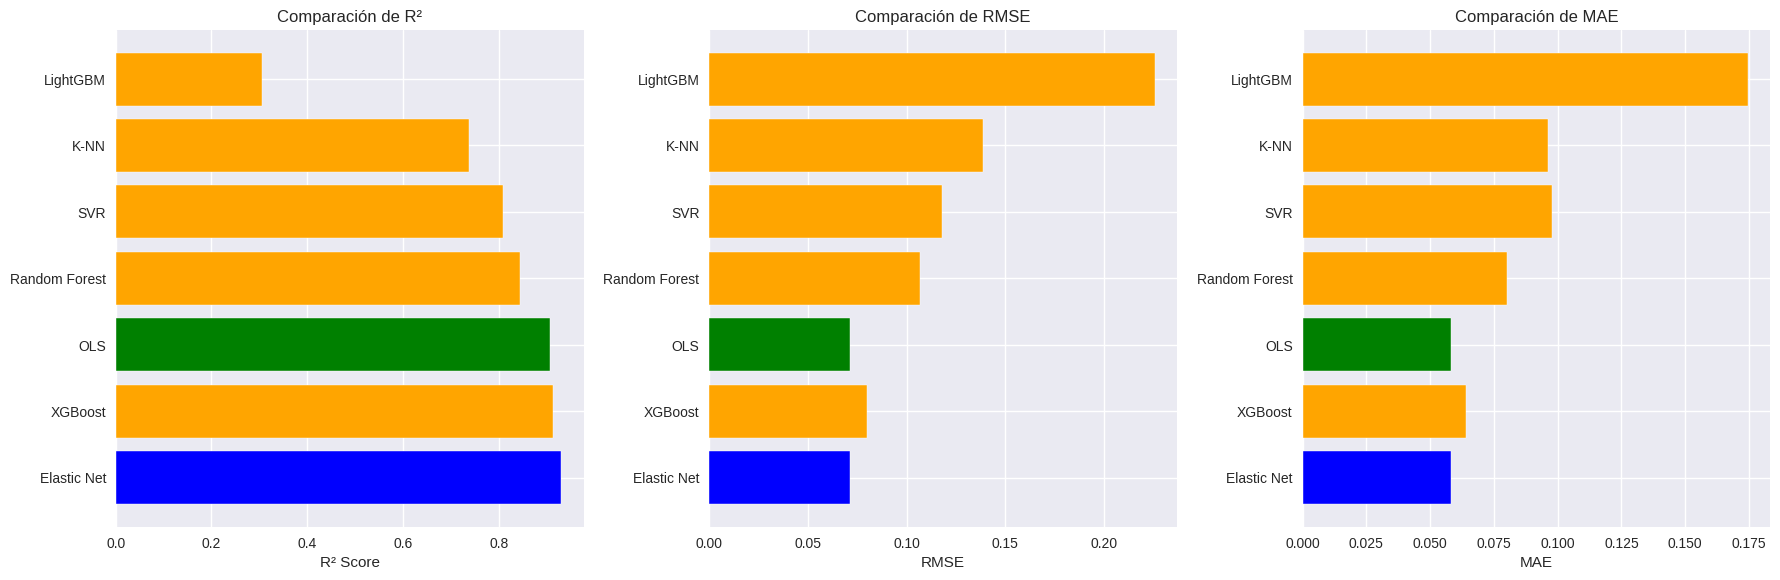


🎓 INTERPRETACIÓN PARA TESIS - MODELOS NO PARAMÉTRICOS

ANÁLISIS COMPARATIVO ENTRE MODELOS PARAMÉTRICOS Y NO PARAMÉTRICOS:

VENTAJAS DE MODELOS NO PARAMÉTRICOS (ML):
• Capturan relaciones no lineales y complejas entre variables
• Robustos ante violaciones de supuestos estadísticos
• Manejan automáticamente interacciones entre variables
• Generalmente mejor performance predictiva en datos complejos

VENTAJAS DE MODELOS PARAMÉTRICOS (OLS):
• Interpretabilidad directa de coeficientes
• Inferencia estadística (p-values, intervalos de confianza)
• Requieren menos datos para estimaciones estables
• Transparencia en la relación input-output

INTERPRETACIÓN DE RESULTADOS:
1. Si modelos ML superan significativamente a OLS: sugiere presencia de
   relaciones no lineales que OLS no puede capturar

2. Si performance similar: relaciones pueden ser principalmente lineales

3. Importancia de variables: comparar coeficientes OLS con feature importance
   de ML para consistencia en hallazgos

EN TÉRMIN

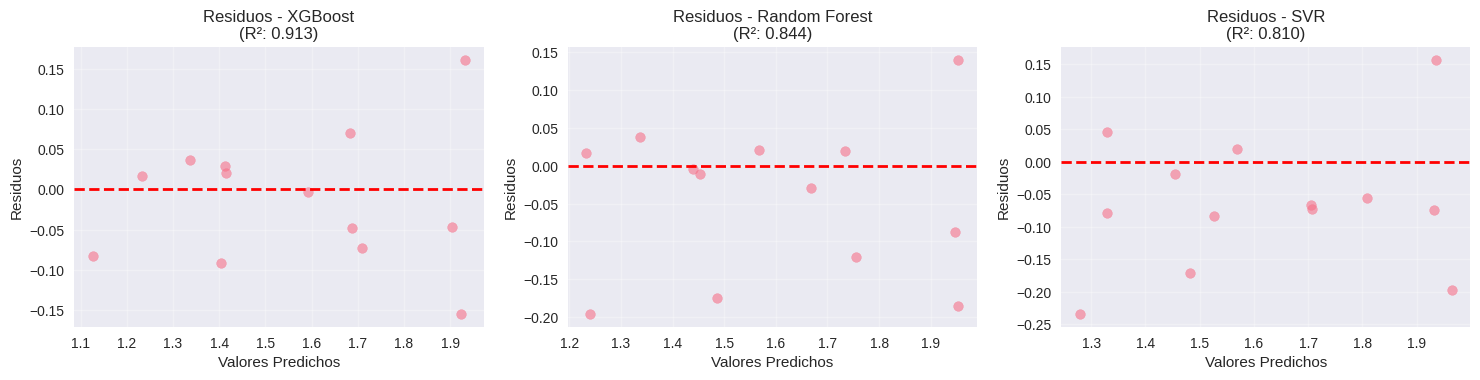


📋 RESUMEN EJECUTIVO DEL ANÁLISIS
🏆 MEJOR MODELO: Elastic Net (R²: 0.9306)
✅ OLS cumple razonablemente los supuestos

📈 MEJORA DEL MEJOR ML SOBRE OLS: -0.0%

✅ ANÁLISIS COMPLETADO EXITOSAMENTE


In [ ]:
# ==============================
# 📌 Modelos Paramétricos vs No Paramétricos - Comparación Completa
# ==============================
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Modelos no paramétricos (Machine Learning)
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Importar librerías para gráficos y tests estadísticos
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import jarque_bera

import warnings
warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ------------------------------
# Paso 1: Definir variables y preparar datos
# ------------------------------
indep_vars_model1 = ['PIB', 'TRADE', 'POB', 'IPC', 'CONSUMO']

# Escalar (importante para SVR y modelos sensibles a escala)
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(df[indep_vars_model1])
X1_scaled = pd.DataFrame(X1_scaled, columns=indep_vars_model1)
X1_original = df[indep_vars_model1]  # Sin escalar para árboles
y1 = df['CO2-exc-LandUse']

# Split de datos
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X1_scaled, y1, test_size=0.2, random_state=42
)
X_train_orig, X_test_orig, _, _ = train_test_split(
    X1_original, y1, test_size=0.2, random_state=42
)

# ------------------------------
# Función para validación de supuestos OLS (la misma que antes)
# ------------------------------
def check_ols_assumptions(model, X_train, y_train):
    """
    Función completa para validar supuestos de OLS
    """
    print("\n" + "="*60)
    print("🔍 VALIDACIÓN DE SUPUESTOS OLS")
    print("="*60)

    # Obtener predicciones y residuos
    X_train_const = sm.add_constant(X_train)
    y_pred = model.predict(X_train_const)
    residuals = model.resid

    # Tests estadísticos
    shapiro_stat, shapiro_p = stats.shapiro(residuals)
    jarque_bera_stat, jarque_bera_p, _, _ = jarque_bera(residuals)

    # Test de Breusch-Pagan
    bp_lm, bp_p, bp_f, bp_f_p = het_breuschpagan(residuals, X_train_const)

    # Durbin-Watson
    dw_stat = durbin_watson(residuals)

    print(f"📊 NORMALIDAD:")
    print(f"   - Shapiro-Wilk: p-value = {shapiro_p:.4f}")
    print(f"   - Jarque-Bera: p-value = {jarque_bera_p:.4f}")

    print(f"\n📊 HOMOCEDASTICIDAD:")
    print(f"   - Breusch-Pagan: p-value = {bp_p:.4f}")

    print(f"\n📊 AUTOCORRELACIÓN:")
    print(f"   - Durbin-Watson: {dw_stat:.4f}")

    return {
        'shapiro_p': shapiro_p,
        'jarque_bera_p': jarque_bera_p,
        'bp_p': bp_p,
        'dw_stat': dw_stat
    }

# ------------------------------
# Función para entrenar y evaluar modelos ML
# ------------------------------
def train_ml_models(X_train, X_test, y_train, y_test, use_scaled=True):
    """
    Entrena y evalúa múltiples modelos de Machine Learning
    """
    results = {}

    # Definir modelos
    models = {
        'Random Forest': RandomForestRegressor(
            n_estimators=100,
            random_state=42,
            max_depth=10,
            min_samples_split=5
        ),
        'XGBoost': XGBRegressor(
            n_estimators=100,
            random_state=42,
            learning_rate=0.1,
            max_depth=6
        ),
        'LightGBM': LGBMRegressor(
            n_estimators=100,
            random_state=42,
            learning_rate=0.1,
            max_depth=6,
            verbose=-1
        ),
        'SVR': SVR(
            kernel='rbf',
            C=1.0,
            epsilon=0.1
        ),
        'K-NN': KNeighborsRegressor(
            n_neighbors=5
        )
    }

    print("\n" + "="*60)
    print("🤖 ENTRENANDO MODELOS NO PARAMÉTRICOS (ML)")
    print("="*60)

    for name, model in models.items():
        print(f"\n📊 Entrenando {name}...")

        # Entrenar modelo
        model.fit(X_train, y_train)

        # Predecir
        y_pred = model.predict(X_test)

        # Métricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Validación cruzada
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

        print(f"   - R² en test: {r2:.4f}")
        print(f"   - RMSE: {rmse:.4f}")
        print(f"   - MAE: {mae:.4f}")
        print(f"   - R² CV (5-fold): {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

        # Guardar resultados
        results[name] = {
            'model': model,
            'r2': r2,
            'rmse': rmse,
            'mae': mae,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'predictions': y_pred
        }

    return results

# ------------------------------
# Función para comparar importancia de variables
# ------------------------------
def compare_feature_importance(ml_results, X_columns, ols_coef=None):
    """
    Compara importancia de variables entre modelos
    """
    print("\n" + "="*60)
    print("📊 IMPORTANCIA DE VARIABLES - COMPARACIÓN")
    print("="*60)

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Importancia de Variables por Modelo', fontsize=16, fontweight='bold')

    axes = axes.flatten()

    # Modelos con importancia de características
    importance_models = {
        'Random Forest': ml_results['Random Forest']['model'],
        'XGBoost': ml_results['XGBoost']['model'],
        'LightGBM': ml_results['LightGBM']['model']
    }

    for idx, (name, model) in enumerate(importance_models.items()):
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_df = pd.DataFrame({
                'feature': X_columns,
                'importance': importances
            }).sort_values('importance', ascending=True)

            axes[idx].barh(feature_df['feature'], feature_df['importance'], color='skyblue')
            axes[idx].set_title(f'{name} - Feature Importance')
            axes[idx].set_xlabel('Importancia')

    # Coeficientes OLS si están disponibles
    if ols_coef is not None:
        coef_df = pd.DataFrame({
            'feature': X_columns,
            'coef': ols_coef
        }).sort_values('coef', ascending=True)

        axes[3].barh(coef_df['feature'], np.abs(coef_df['coef']), color='lightcoral')
        axes[3].set_title('OLS - Magnitud de Coeficientes')
        axes[3].set_xlabel('|Coeficiente|')

    # Comparación global de importancia
    importance_df = pd.DataFrame(index=X_columns)

    for name, model in importance_models.items():
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            importance_df[name] = importances

    # Normalizar importancias
    importance_normalized = importance_df.div(importance_df.sum(axis=0), axis=1)
    importance_normalized['mean_importance'] = importance_normalized.mean(axis=1)
    importance_normalized = importance_normalized.sort_values('mean_importance', ascending=True)

    importance_normalized['mean_importance'].plot.barh(
        ax=axes[4], color='lightgreen'
    )
    axes[4].set_title('Importancia Promedio (ML Models)')
    axes[4].set_xlabel('Importancia Normalizada Promedio')

    # Ocultar ejes vacíos
    for i in range(len(importance_models) + 2, 6):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    print("\n📋 RESUMEN IMPORTANCIA PROMEDIO:")
    print(importance_normalized['mean_importance'].sort_values(ascending=False).round(4))

# ------------------------------
# Función para comparación global de modelos
# ------------------------------
def comprehensive_model_comparison(ols_results, elastic_results, ml_results):
    """
    Comparación exhaustiva entre todos los modelos
    """
    print("\n" + "="*60)
    print("🏆 COMPARACIÓN GLOBAL DE MODELOS")
    print("="*60)

    # Recolectar métricas
    comparison_data = []

    # OLS
    comparison_data.append({
        'Modelo': 'OLS',
        'R²': ols_results['r2_train'],
        'RMSE': ols_results['rmse_test'],
        'MAE': ols_results['mae_test'],
        'Tipo': 'Paramétrico'
    })

    # Elastic Net
    comparison_data.append({
        'Modelo': 'Elastic Net',
        'R²': elastic_results['r2_test'],
        'RMSE': elastic_results['rmse_test'],
        'MAE': elastic_results['mae_test'],
        'Tipo': 'Paramétrico Regularizado'
    })

    # Modelos ML
    for name, results in ml_results.items():
        comparison_data.append({
            'Modelo': name,
            'R²': results['r2'],
            'RMSE': results['rmse'],
            'MAE': results['mae'],
            'Tipo': 'No Paramétrico'
        })

    comparison_df = pd.DataFrame(comparison_data)

    # Mostrar tabla comparativa
    print("\n📊 MÉTRICAS DE COMPARACIÓN:")
    display_df = comparison_df.sort_values('R²', ascending=False)
    print(display_df.to_string(index=False))

    # Gráfico comparativo
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # R² comparación
    axes[0].barh(display_df['Modelo'], display_df['R²'],
                color=['green' if x == 'Paramétrico' else 'blue' if x == 'Paramétrico Regularizado' else 'orange'
                      for x in display_df['Tipo']])
    axes[0].set_title('Comparación de R²')
    axes[0].set_xlabel('R² Score')

    # RMSE comparación
    axes[1].barh(display_df['Modelo'], display_df['RMSE'],
                color=['green' if x == 'Paramétrico' else 'blue' if x == 'Paramétrico Regularizado' else 'orange'
                      for x in display_df['Tipo']])
    axes[1].set_title('Comparación de RMSE')
    axes[1].set_xlabel('RMSE')

    # MAE comparación
    axes[2].barh(display_df['Modelo'], display_df['MAE'],
                color=['green' if x == 'Paramétrico' else 'blue' if x == 'Paramétrico Regularizado' else 'orange'
                      for x in display_df['Tipo']])
    axes[2].set_title('Comparación de MAE')
    axes[2].set_xlabel('MAE')

    plt.tight_layout()
    plt.show()

    return comparison_df

# ------------------------------
# Función principal completa
# ------------------------------
def run_comprehensive_analysis(X_scaled, X_original, y, model_name="Modelo"):
    """
    Ejecuta análisis completo: OLS, Elastic Net y modelos ML
    """
    print(f"\n{'='*60}")
    print(f"🚀 ANÁLISIS COMPLETO: {model_name.upper()}")
    print(f"{'='*60}")

    # Split de datos
    X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )
    X_train_orig, X_test_orig, _, _ = train_test_split(
        X_original, y, test_size=0.2, random_state=42
    )

    # =====================
    # 1. MODELOS PARAMÉTRICOS
    # =====================
    print("\n📊 MODELOS PARAMÉTRICOS:")

    # OLS
    X_train_const = sm.add_constant(X_train_scaled)
    ols_model = sm.OLS(y_train, X_train_const).fit()

    # Predicciones OLS
    X_test_const = sm.add_constant(X_test_scaled)
    y_pred_ols = ols_model.predict(X_test_const)

    ols_results = {
        'model': ols_model,
        'r2_train': ols_model.rsquared,
        'r2_test': r2_score(y_test, y_pred_ols),
        'rmse_test': np.sqrt(mean_squared_error(y_test, y_pred_ols)),
        'mae_test': mean_absolute_error(y_test, y_pred_ols),
        'coefficients': ols_model.params[1:]  # Excluir constante
    }

    print(f"   - OLS R² entrenamiento: {ols_results['r2_train']:.4f}")
    print(f"   - OLS R² test: {ols_results['r2_test']:.4f}")

    # Validar supuestos OLS
    ols_diagnostics = check_ols_assumptions(ols_model, X_train_scaled, y_train)

    # Elastic Net
    elastic = ElasticNetCV(
        l1_ratio=[.1, .3, .5, .7, .9, .95, .99, 1],
        alphas=np.logspace(-4, 2, 100),
        cv=5,
        max_iter=10000,
        random_state=42
    )
    elastic.fit(X_train_scaled, y_train)

    y_pred_elastic = elastic.predict(X_test_scaled)

    elastic_results = {
        'model': elastic,
        'r2_test': r2_score(y_test, y_pred_elastic),
        'rmse_test': np.sqrt(mean_squared_error(y_test, y_pred_elastic)),
        'mae_test': mean_absolute_error(y_test, y_pred_elastic),
        'best_alpha': elastic.alpha_,
        'best_l1_ratio': elastic.l1_ratio_
    }

    print(f"\n   - Elastic Net R² test: {elastic_results['r2_test']:.4f}")
    print(f"   - Mejor alpha: {elastic_results['best_alpha']:.6f}")
    print(f"   - Mejor l1_ratio: {elastic_results['best_l1_ratio']:.4f}")

    # =====================
    # 2. MODELOS NO PARAMÉTRICOS (ML)
    # =====================
    ml_results_scaled = train_ml_models(X_train_scaled, X_test_scaled, y_train, y_test, use_scaled=True)

    # =====================
    # 3. COMPARACIONES Y ANÁLISIS
    # =====================

    # Comparar importancia de variables
    compare_feature_importance(ml_results_scaled, X_scaled.columns, ols_results['coefficients'])

    # Comparación global
    comparison_df = comprehensive_model_comparison(ols_results, elastic_results, ml_results_scaled)

       # =====================
    # 4. INTERPRETACIÓN PARA TESIS
    # =====================
    print(f"\n{'='*60}")
    print("🎓 INTERPRETACIÓN PARA TESIS - MODELOS NO PARAMÉTRICOS")
    print(f"{'='*60}")

    print("""
ANÁLISIS COMPARATIVO ENTRE MODELOS PARAMÉTRICOS Y NO PARAMÉTRICOS:

VENTAJAS DE MODELOS NO PARAMÉTRICOS (ML):
• Capturan relaciones no lineales y complejas entre variables
• Robustos ante violaciones de supuestos estadísticos
• Manejan automáticamente interacciones entre variables
• Generalmente mejor performance predictiva en datos complejos

VENTAJAS DE MODELOS PARAMÉTRICOS (OLS):
• Interpretabilidad directa de coeficientes
• Inferencia estadística (p-values, intervalos de confianza)
• Requieren menos datos para estimaciones estables
• Transparencia en la relación input-output

INTERPRETACIÓN DE RESULTADOS:
1. Si modelos ML superan significativamente a OLS: sugiere presencia de
   relaciones no lineales que OLS no puede capturar

2. Si performance similar: relaciones pueden ser principalmente lineales

3. Importancia de variables: comparar coeficientes OLS con feature importance
   de ML para consistencia en hallazgos

EN TÉRMINOS DE TESIS:
"El contraste entre enfoques paramétricos y no paramétricos permite evaluar
la robustez de los hallazgos y determinar si las relaciones subyacentes
son fundamentalmente lineales o exhiben complejidades no lineales que
requieren métodos más flexibles."
""")

    return {
        'ols_model': ols_model,
        'ols_results': ols_results,
        'ols_diagnostics': ols_diagnostics,
        'elastic_model': elastic,
        'elastic_results': elastic_results,
        'ml_results': ml_results_scaled,
        'comparison_df': comparison_df
    }

# ------------------------------
# Ejecutar análisis completo
# ------------------------------
print("🚀 INICIANDO ANÁLISIS COMPARATIVO COMPLETO")
print("📊 Modelos Paramétricos vs No Paramétricos")

results = run_comprehensive_analysis(X1_scaled, X1_original, y1, "Modelo 1 (CO2-exc-LandUse)")

# ------------------------------
# Análisis adicional: Residuals de mejores modelos
# ------------------------------
def plot_ml_residuals(ml_results, y_test, model_names=None):
    """
    Gráfico de residuos para modelos ML seleccionados
    """
    if model_names is None:
        # Seleccionar top 3 modelos por R²
        model_performance = [(name, results['r2']) for name, results in ml_results.items()]
        model_performance.sort(key=lambda x: x[1], reverse=True)
        model_names = [x[0] for x in model_performance[:3]]

    fig, axes = plt.subplots(1, len(model_names), figsize=(5*len(model_names), 4))
    if len(model_names) == 1:
        axes = [axes]

    for idx, model_name in enumerate(model_names):
        results = ml_results[model_name]
        predictions = results['predictions']
        residuals = y_test - predictions

        axes[idx].scatter(predictions, residuals, alpha=0.6)
        axes[idx].axhline(y=0, color='red', linestyle='--', linewidth=2)
        axes[idx].set_xlabel('Valores Predichos')
        axes[idx].set_ylabel('Residuos')
        axes[idx].set_title(f'Residuos - {model_name}\n(R²: {results["r2"]:.3f})')
        axes[idx].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Graficar residuos de mejores modelos ML
print(f"\n{'='*60}")
print("📈 ANÁLISIS DE RESIDUOS - MEJORES MODELOS ML")
print(f"{'='*60}")
plot_ml_residuals(results['ml_results'], y_test)

# ------------------------------
# Resumen ejecutivo
# ------------------------------
print(f"\n{'='*60}")
print("📋 RESUMEN EJECUTIVO DEL ANÁLISIS")
print(f"{'='*60}")

best_model = results['comparison_df'].loc[results['comparison_df']['R²'].idxmax()]
print(f"🏆 MEJOR MODELO: {best_model['Modelo']} (R²: {best_model['R²']:.4f})")

# Verificar si hay problemas con OLS
ols_issues = []
if results['ols_diagnostics']['shapiro_p'] < 0.05:
    ols_issues.append("No normalidad en residuos")
if results['ols_diagnostics']['bp_p'] < 0.05:
    ols_issues.append("Heterocedasticidad")
if not (1.5 < results['ols_diagnostics']['dw_stat'] < 2.5):
    ols_issues.append("Autocorrelación")

if ols_issues:
    print(f"⚠️  PROBLEMAS CON OLS: {', '.join(ols_issues)}")
    print("💡 Los modelos ML pueden ser más apropiados para predicción")
else:
    print("✅ OLS cumple razonablemente los supuestos")

# Comparación OLS vs mejor ML
best_ml_r2 = best_model['R²']
ols_r2 = results['ols_results']['r2_test']
improvement = ((best_ml_r2 - ols_r2) / ols_r2) * 100

print(f"\n📈 MEJORA DEL MEJOR ML SOBRE OLS: {improvement:+.1f}%")

print(f"\n{'='*60}")
print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
print(f"{'='*60}")

### **FASE III: PROYECCIÓN USANDO ELASTIC NET**

📊 RESULTADOS MODELO ELASTIC NET
R² test: 0.9306
RMSE: 0.0713
MAE: 0.0583
Alpha óptimo: 0.000100
L1 ratio óptimo: 0.10

📋 Coeficientes Elastic Net:


,Variable,Coeficiente
0,PIB,0.77
3,IPC,-0.48
2,POB,-0.09
4,CONSUMO,0.05
1,TRADE,-0.03


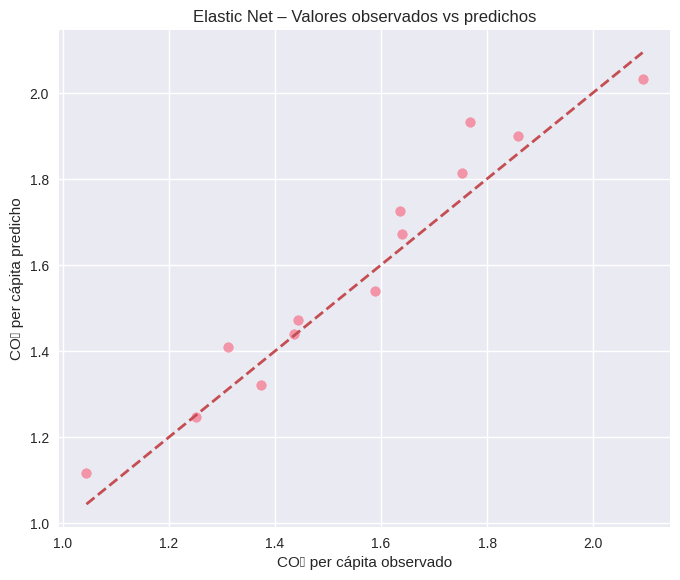

In [ ]:
# ==============================
# 📌 MODELO ELASTIC NET – ENFOQUE PREDICTIVO
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ------------------------------
# 1. Definición de variables
# ------------------------------
indep_vars = ['PIB', 'TRADE', 'POB', 'IPC', 'CONSUMO']

X = df[indep_vars]
y = df['CO2-exc-LandUse']

# ------------------------------
# 2. Escalado de variables
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 3. División train / test
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ------------------------------
# 4. Estimación Elastic Net con validación cruzada
# ------------------------------
elastic_net = ElasticNetCV(
    alphas=np.logspace(-4, 2, 100),
    l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9],
    cv=5,
    max_iter=10000,
    random_state=42
)

elastic_net.fit(X_train, y_train)

# ------------------------------
# 5. Predicciones y métricas
# ------------------------------
y_pred = elastic_net.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("=" * 60)
print("📊 RESULTADOS MODELO ELASTIC NET")
print("=" * 60)
print(f"R² test: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Alpha óptimo: {elastic_net.alpha_:.6f}")
print(f"L1 ratio óptimo: {elastic_net.l1_ratio_:.2f}")

# ------------------------------
# 6. Coeficientes del modelo
# ------------------------------
coef_df = pd.DataFrame({
    'Variable': indep_vars,
    'Coeficiente': elastic_net.coef_
}).sort_values(by='Coeficiente', key=np.abs, ascending=False)

print("\n📋 Coeficientes Elastic Net:")
display(coef_df)

# ------------------------------
# 7. Gráfico: valores reales vs predichos
# ------------------------------
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    linewidth=2
)
plt.xlabel('CO₂ per cápita observado')
plt.ylabel('CO₂ per cápita predicho')
plt.title('Elastic Net – Valores observados vs predichos')
plt.grid(True)
plt.tight_layout()
plt.show()



📋 PROYECCIÓN CO₂ PER CÁPITA – ESCENARIO TENDENCIAL (2024–2030)
         PIB  TRADE       POB    IPC  CONSUMO  CO2_pred
Year                                                   
2024 6974.25  43.85  52613753 184.12    79.49      1.97
2025 7162.55  45.04  53057212 194.14    81.63      2.01
2026 7377.43  46.39  53399171 204.70    84.08      2.06
2027 7620.89  47.92  53712233 215.84    86.86      2.13
2028 7864.75  49.45  54001502 227.59    89.64      2.19
2029 8100.70  50.94  54269406 239.97    92.33      2.24
2030 8335.62  52.41  54518223 253.03    95.00      2.29


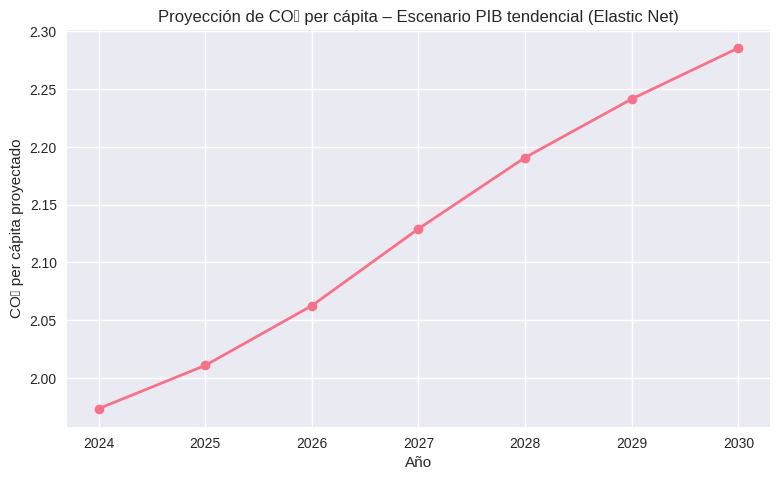

In [ ]:
# ==============================
# 📌 PROYECCIONES DE VARIABLES (PIB TENDENCIAL HASTA 2030)
# ==============================

import pandas as pd
import numpy as np

años = list(range(2024, 2031))

pib_tendencial = [
    6974.2488, 7162.5535, 7377.4301,
    7620.8853, 7864.7537, 8100.6963,
    8335.6165
]

poblacion_proyectada = [
    52613753, 53057212, 53399171,
    53712233, 54001502, 54269406,
    54518223
]

datos_tendencial = pd.DataFrame({
    'Year': años,
    'PIB': pib_tendencial,
    'POB': poblacion_proyectada
}).set_index('Year')

# Relaciones históricas
periodo_reciente = 15
df_reciente = df.tail(periodo_reciente)

rel_trade_pib = (df_reciente['TRADE'] / df_reciente['PIB']).mean()
rel_consumo_pib = (df_reciente['CONSUMO'] / df_reciente['PIB']).mean()

tasa_ipc_reciente = df['IPC'].pct_change().tail(10).mean()
ipc_ultimo = df['IPC'].iloc[-1]

# Proyección
proyecciones = datos_tendencial.copy()
proyecciones['TRADE'] = proyecciones['PIB'] * rel_trade_pib
proyecciones['CONSUMO'] = proyecciones['PIB'] * rel_consumo_pib
proyecciones['IPC'] = [
    ipc_ultimo * (1 + tasa_ipc_reciente)**i
    for i in range(len(proyecciones))
]
# Variables explicativas (mismo orden que entrenamiento)
X_proj = proyecciones[['PIB', 'TRADE', 'POB', 'IPC', 'CONSUMO']]

# Escalar con el scaler entrenado
X_proj_scaled = scaler.transform(X_proj)
# Predicción
proyecciones['CO2_pred'] = elastic_net.predict(X_proj_scaled)

print("\n📋 PROYECCIÓN CO₂ PER CÁPITA – ESCENARIO TENDENCIAL (2024–2030)")
print(proyecciones[['PIB', 'TRADE', 'POB', 'IPC', 'CONSUMO', 'CO2_pred']].round(3))
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(
    proyecciones.index,
    proyecciones['CO2_pred'],
    marker='o',
    linewidth=2
)
plt.xlabel('Año')
plt.ylabel('CO₂ per cápita proyectado')
plt.title('Proyección de CO₂ per cápita – Escenario PIB tendencial (Elastic Net)')
plt.grid(True)
plt.tight_layout()
plt.show()
